In [17]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil in c:\users\38098\anaconda3\lib\site-packages (2.8.2)



In [18]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\38098\anaconda3\lib\site-packages (0.13.2)



In [93]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math


In [92]:
df = sm.datasets.sunspots.load_pandas().data
dates = df['YEAR'].astype(int).astype(str)
df.index = pd.to_datetime(dates, format='%Y-%m-%d')
df.set_index(df.index, inplace=True)
df = df.drop(columns=['YEAR'])
if not isinstance(df['SUNACTIVITY'], pd.Series):
    ts_sun = pd.Series(df['SUNACTIVITY'])
    
    
df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


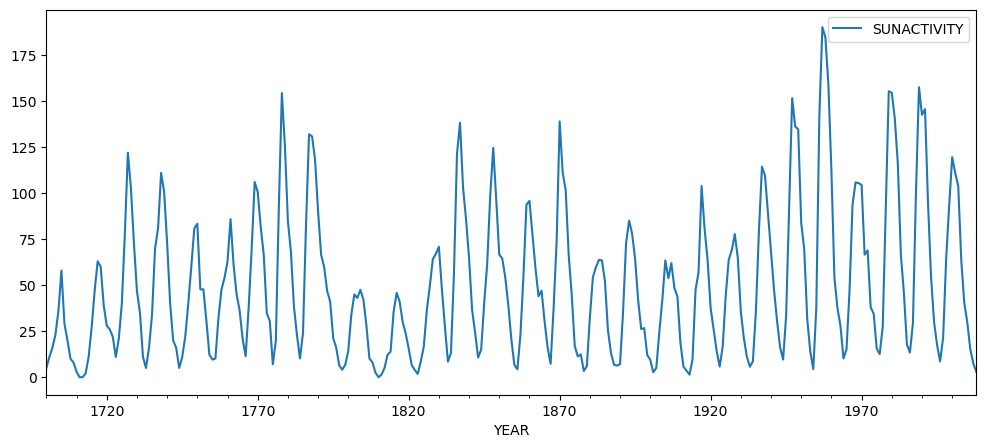

In [53]:
df.plot(figsize=(12, 5))
plt.show()

In [54]:
rolling_mean = df.rolling(14).mean()
rolling_std = df.rolling(14).std()


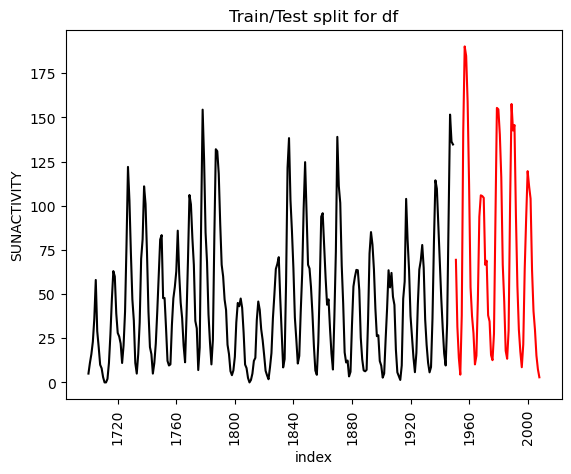

In [55]:
train=df[df.index < pd.to_datetime('1950-01-01', format='%Y-%m-%d')]
test=df[df.index > pd.to_datetime('1950-01-01', format='%Y-%m-%d')]
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('SUNACTIVITY')
plt.xlabel('index')
plt.xticks(rotation=90)
plt.title("Train/Test split for df")
plt.show()

In [56]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

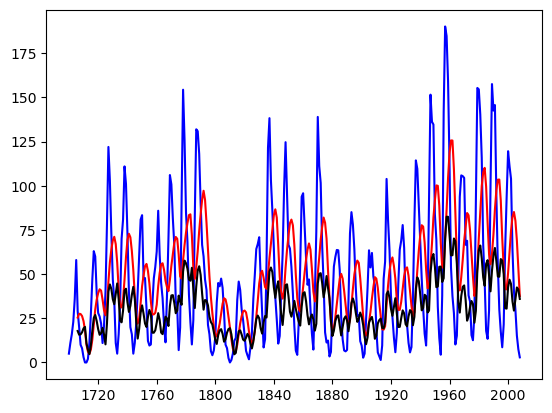

In [57]:
plt.plot(df, color="blue",label="Original sunspots")
plt.plot(rolling_mean, color="red", label="Rolling Mean sunspots")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in sunspots")


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

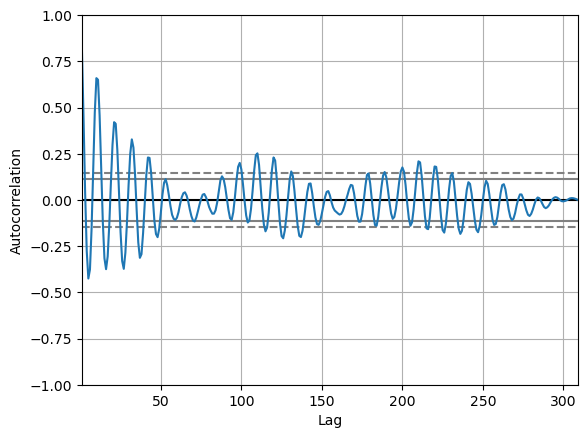

In [58]:
autocorrelation_plot(df)

In [96]:
residuals=model_fit.resid[1:]
#acf_value=autocorrelation(ts_sun.Temp)
#pacf_value=pacf(ts_sun.Temp,nlags=3)

In [66]:
test_res = adfuller(df,autolag="AIC")
if test_res[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary ")

adfuller(df)


Data is non-stationary 


(-2.8377807249381912,
 0.053076421728121076,
 8,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 2430.50034229055)

In [98]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0   -2.837781              Test Statistics
1    0.053076                      p-value
2    8.000000             No. of lags used
3  300.000000  Number of observations used
4   -3.452337          critical value (1%)
5   -2.871223          critical value (5%)
6   -2.571929         critical value (10%)


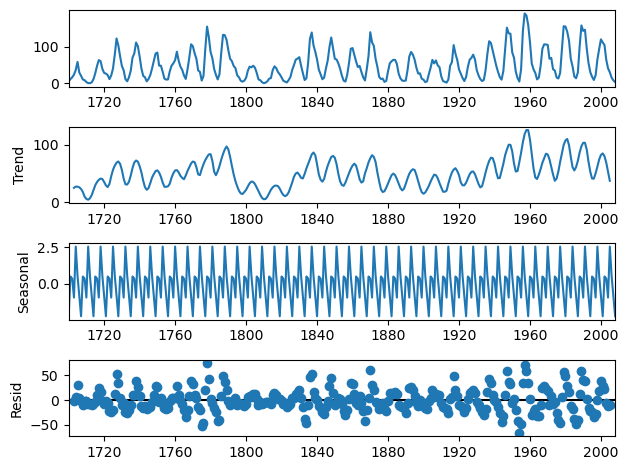

In [71]:
decompose = seasonal_decompose(df,model='additive', period=7)
trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid
decompose.plot()
plt.show()

In [104]:
test_len = int(len(df) * 0.2)
df_train, df_test = df.iloc[:-test_len], df.iloc[-test_len:]

model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
pred = model_fit.predict(len(df)+1, len(df)+28)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  248
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1055.487
Date:                Sun, 07 May 2023   AIC                           2116.973
Time:                        23:51:09   BIC                           2127.502
Sample:                    01-01-1700   HQIC                          2121.212
                         - 01-01-1947                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6781      0.050     13.672      0.000       0.581       0.775
ar.L2         -0.2604      0.053     -4.950      0.000      -0.363      -0.157
sigma2       300.8401     22.369     13.449      0.0

In [105]:
pred

2010-01-01    167.365443
2011-01-01    167.365443
2012-01-01    167.365443
2013-01-01    167.365443
2014-01-01    167.365443
2015-01-01    167.365443
2016-01-01    167.365443
2017-01-01    167.365443
2018-01-01    167.365443
2019-01-01    167.365443
2020-01-01    167.365443
2021-01-01    167.365443
2022-01-01    167.365443
2023-01-01    167.365443
2024-01-01    167.365443
2025-01-01    167.365443
2026-01-01    167.365443
2027-01-01    167.365443
2028-01-01    167.365443
2029-01-01    167.365443
2030-01-01    167.365443
2031-01-01    167.365443
2032-01-01    167.365443
2033-01-01    167.365443
2034-01-01    167.365443
2035-01-01    167.365443
2036-01-01    167.365443
2037-01-01    167.365443
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [90]:
X = df.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=22.376508, expected=37.600000
predicted=50.740723, expected=27.900000
predicted=48.429121, expected=10.200000
predicted=22.630579, expected=15.100000
predicted=40.564859, expected=47.000000
predicted=70.751208, expected=93.800000
predicted=114.447832, expected=105.900000
predicted=104.321995, expected=105.500000
predicted=91.473596, expected=104.500000
predicted=90.704834, expected=66.600000
predicted=33.269485, expected=68.900000
predicted=70.768593, expected=38.000000
predicted=32.548764, expected=34.500000
predicted=36.531231, expected=15.500000
predicted=26.746491, expected=12.600000
predicted=13.602944, expected=27.500000
predicted=48.581279, expected=92.500000
predicted=122.923868, expected=155.400000
predicted=181.403067, expected=154.600000
predicted=132.709814, expected=140.400000
predicted=113.615118, expected=115.900000
predicted=84.511758, expected=66.600000
predicted=29.067752, expected=45.900000
predicted=47.786131, expected=17.900000
predicted=23.219297, expect

NameError: name 'sqrt' is not defined